## Experiment 4: Binary Classification with Random Forest

In this experiment we will build a binary classifier using the Random Forest Algorithm.

The steps are:
1.   Load and explore dataset
2.   Prepare Data
3.   Split Data
4.   Assess Baseline Model
5.   Train Initial RandomForest with Default Hyperparameter
6.   Reduce Overfitting with n_estimators
7.   Reduce Overfitting with max_depth
8.   Reduce Overfitting with min_samples_leaf
9.   Reduce Overfitting with max_features
10.  Features Importance

### 1. Load and Explore Dataset

In [74]:
import pandas as pd
import numpy as np

**[1.1]** Loading Dataset

In [75]:
url='https://drive.google.com/file/d/177p-Vaa2__BtaxNCmd4YGBv7zfENUNmy/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col = False)

**[1.2]** Dataset Exploration

In [76]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [78]:
print( f" Percentage Null values - 'age_band' : {100 * df['age_band'].isna().sum() / len(df)}" )
print( f" Percentage Null values - 'gender' : {100 * df['gender'].isna().sum() / len(df)}" )

 Percentage Null values - 'age_band' : 85.56233201611123
 Percentage Null values - 'gender' : 52.77111552723147


In [79]:
df[df.duplicated()]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased


In [80]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [81]:
for cols in df.columns:
    print(cols)
    print(df[cols].unique())

ID
[     1      2      3 ... 154137 154138 154139]
Target
[0 1]
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
gender
['Male' nan 'Female']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']
age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[

### 2. Data Preparation

In [82]:
df_cleaned = df.copy()

In [83]:
## Dropping columns ID, gender and age_band
df_cleaned.drop(['ID','gender', 'age_band'], axis = 1, inplace = True)

In [84]:
#Applying one-hot encoding to the nominal data 'Car_model'
df_car_model = pd.get_dummies(df_cleaned['car_model'])
df_car_model

,model_1,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
131335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### We will map numerical values to the ordinal data under 'car_segment'

In [85]:
ord_cols = ['car_segment']
for col in ord_cols:
  print(col)
  print(df_cleaned[col].unique()) 

car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


In [86]:
car_segment_mapper = {
    "Other": 0, 
    "LCV": 1, 
    "Small/Medium": 2,
    "Large/SUV": 3
}
car_segment_mapper

{'Other': 0, 'LCV': 1, 'Small/Medium': 2, 'Large/SUV': 3}

In [87]:
df_cleaned["car_segment"] = df_cleaned["car_segment"].replace(car_segment_mapper)
df_cleaned["car_segment"]

0         1
1         2
2         3
3         3
4         2
         ..
131332    3
131333    3
131334    3
131335    3
131336    1
Name: car_segment, Length: 131337, dtype: int64

 #### Merging the encoded data-frame

In [88]:
X = pd.concat([df_cleaned, df_car_model], axis=1)
X.drop('car_model', axis = 1, inplace = True)

In [89]:
y = X.pop('Target')

### 4. Data Splitting

In [90]:
y.value_counts(normalize=True)

0    0.973191
1    0.026809
Name: Target, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_data, X_test, y_data, y_test = train_test_split (X, y, test_size=0.2, random_state=8)

In [93]:
y_test.value_counts(normalize=True)

0    0.971867
1    0.028133
Name: Target, dtype: float64

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

In [95]:
y_train.value_counts(normalize=True)

0    0.973494
1    0.026506
Name: Target, dtype: float64

In [96]:
y_val.value_counts(normalize=True)

0    0.973637
1    0.026363
Name: Target, dtype: float64

## 4. Assess Baseline Model

**[4.1]** Find the mode of the target variable from the training set and print its value

In [98]:
y_mode = y_train.mode()
y_mode

0    0
Name: Target, dtype: int64

**[4.2]** Create a numpy array with the same dimensions as for the training set called `y_base` filled with this value



In [100]:
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

**[4.3]** Import the accuracy score from sklearn

In [102]:
from sklearn.metrics import accuracy_score

**[4.4]** Display the accuracy score of this baseline model on the training set

In [104]:
accuracy_score(y_train, y_base)

0.9734935458925703

## 5. Train Initial RandomForest with Default Hyperparameter

**[5.1]** Import the RandomForestClassifier from sklearn.ensemble

In [106]:
from sklearn.ensemble import RandomForestClassifier

**[5.2]** Instantiate the RandomForestClassifier class called rf1 with a random state=8

In [108]:
rf1 = RandomForestClassifier(random_state=8)

**[5.3]** Fit the RandomForest model

In [110]:
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

**[5.4]** Calculate the accuracy of the RandomForest on the training and validation sets and print them

In [112]:
print(rf1.score(X_train, y_train))
print(rf1.score(X_val, y_val))

0.9999881030277794
0.9924812030075187


## 6. Reduce Overfitting with n_estimators

**[6.1]** Train a RandomForestClassifier model with n_estimators=50 and print the accuracy score for the training and validation sets

In [114]:
rf2 = RandomForestClassifier(random_state=8, n_estimators=50).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.9999405151388971
0.9924336156847816


**[6.2]** Train a RandomForestClassifier model with n_estimators=200 and print the accuracy score for the training and validation sets

In [116]:
rf2 = RandomForestClassifier(random_state=8, n_estimators=200).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.9999881030277794
0.9923860283620444


## 7. Reduce Overfitting with max_depth

**[7.1]** Print the average "**max_depth**" for rf2:

In [117]:
np.mean([estimator.tree_.max_depth for estimator in rf2.estimators_])

28.41

**[7.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=10 and print the accuracy score for the training and validation sets

In [119]:
rf3 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=10).fit(X_train, y_train)
print(rf3.score(X_train, y_train))
print(rf3.score(X_val, y_val))

0.9891618583070608
0.9877700580565337


**[7.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=20 and print the accuracy score for the training and validation sets

In [121]:
rf4 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=20).fit(X_train, y_train)
print(rf4.score(X_train, y_train))
print(rf4.score(X_val, y_val))

0.9992504907501041
0.9926715522984677


**[7.4]** xTrain a RandomForestClassifier model with n_estimators=50, max_depth=15 and print the accuracy score for the training and validation sets

In [123]:
rf5 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15).fit(X_train, y_train)
print(rf5.score(X_train, y_train))
print(rf5.score(X_val, y_val))

0.9965498780560348
0.991672218520986


## 8.   Reduce Overfitting with min_samples_leaf

**[8.1]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2 and print the accuracy score for the training and validation sets

In [125]:
rf6 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2).fit(X_train, y_train)
print(rf6.score(X_train, y_train))
print(rf6.score(X_val, y_val))

0.9946820534174052
0.9912915199390883


**[8.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=10 and print the accuracy score for the training and validation sets

In [127]:
rf7 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=10).fit(X_train, y_train)
print(rf7.score(X_train, y_train))
print(rf7.score(X_val, y_val))

0.9891142704181786
0.9884838678975921


**[8.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=5 and print the accuracy score for the training and validation sets

In [129]:
rf8 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=5).fit(X_train, y_train)
print(rf8.score(X_train, y_train))
print(rf8.score(X_val, y_val))

0.9918981619177919
0.9907680593889788


## 9.   Reduce Overfitting with max_features

**[9.1]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2 and print the accuracy score for the training and validation sets

In [131]:
rf9 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2).fit(X_train, y_train)
print(rf9.score(X_train, y_train))
print(rf9.score(X_val, y_val))

0.9861043364463744
0.9834871990101837


**[9.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5 and print the accuracy score for the training and validation sets

In [133]:
rf10 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5).fit(X_train, y_train)
print(rf10.score(X_train, y_train))
print(rf10.score(X_val, y_val))

0.9946820534174052
0.9912915199390883


**[9.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None and print the accuracy score for the training and validation sets

In [135]:
rf11 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None).fit(X_train, y_train)
print(rf11.score(X_train, y_train))
print(rf11.score(X_val, y_val))

0.9971804175837249
0.9930998382031027


**[9.4]** Print the accuracy score of the best model on the testing set

In [137]:
print(rf7.score(X_test, y_test))

0.9878559463986599


**[9.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[9.6]** Task: Plot the confusion matrics for the training, validation and testing sets

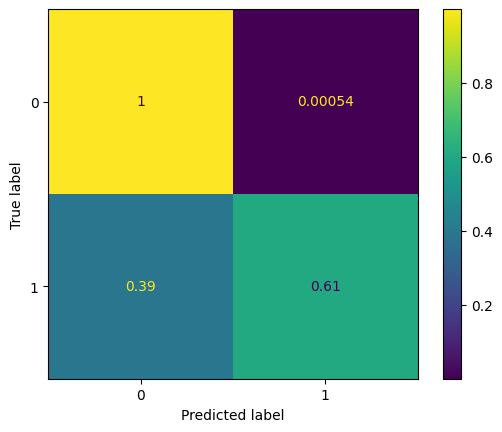

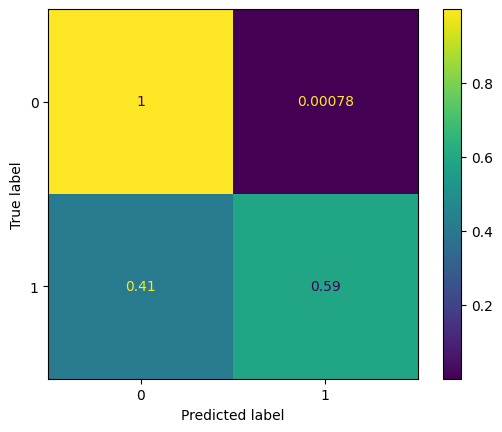

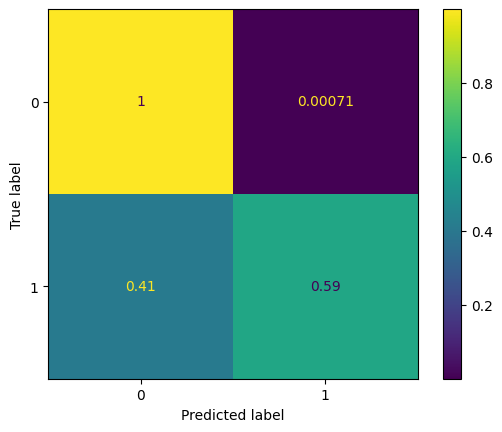

In [141]:
ConfusionMatrixDisplay.from_estimator(rf7, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf7, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf7, X_test, y_test, normalize='true')

## 10.  Features Importance


**[10.1]** Task: Print the features importance of rf7

In [143]:
rf7.feature_importances_

array([3.84242206e-03, 9.92622082e-02, 7.99043347e-02, 4.33478561e-02,
       6.23844040e-02, 3.30327677e-02, 5.04235779e-02, 9.60568483e-02,
       1.59515628e-01, 1.58172530e-01, 6.68364439e-02, 1.33751776e-01,
       1.77189108e-03, 1.16867745e-03, 1.64156766e-03, 9.83061469e-06,
       2.04734596e-04, 3.98699619e-06, 4.30229603e-11, 0.00000000e+00,
       3.38773941e-05, 3.67364196e-05, 0.00000000e+00, 2.14481984e-03,
       2.06669690e-03, 1.07454987e-03, 1.18123824e-03, 6.68042062e-05,
       6.44592443e-04, 1.38485663e-03, 3.43428094e-05])

**[10.2]** Create a Dataframe with these values

In [144]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train.columns,
     'feature_importance': rf7.feature_importances_
     }
)

In [145]:
feat_imp_rf_df

,feature,feature_importance
0,car_segment,3.842422e-03
1,age_of_vehicle_years,9.926221e-02
2,sched_serv_warr,7.990433e-02
3,non_sched_serv_warr,4.334786e-02
4,sched_serv_paid,6.238440e-02
5,non_sched_serv_paid,3.303277e-02
6,total_paid_services,5.042358e-02
7,total_services,9.605685e-02
8,mth_since_last_serv,1.595156e-01
9,annualised_mileage,1.581725e-01


**[10.3]** Sort the previous dataframe and reset its index

In [147]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[10.4]** Display the first 10 rows of this dataframe 

In [149]:
feat_imp_rf_df.head(10)

,feature,feature_importance
0,mth_since_last_serv,0.159516
1,annualised_mileage,0.158173
2,num_serv_dealer_purchased,0.133752
3,age_of_vehicle_years,0.099262
4,total_services,0.096057
5,sched_serv_warr,0.079904
6,num_dealers_visited,0.066836
7,sched_serv_paid,0.062384
8,total_paid_services,0.050424
9,non_sched_serv_warr,0.043348


**[10.5]** We can visualise this information on a graph

In [150]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)